#                         The Spark Foundation #GRIPJUNE2021
#           TASK 2 - Prection using Unsupervised ML- K-Means Clustering

# By- Shruti Dhawle-(Data Science & Business Analytics)

### Objective : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
#### Libraries/Datasets Used: Scikit Learn, Pandas, Numpy, Seaborn,Iris Dataset
#### Task completed during Data Science & Business Analytics Internship @ The Sparks Foundation

# Importing Libraries
Apart from NumPy, Pandas, and Matplotlib, we’re also importing KMeans from sklearn.cluster

In [7]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree


In [8]:
# Load the iris dataset
df = datasets.load_iris()
df = pd.DataFrame(df.data, columns = df.feature_names)
df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# To know number of rows and collumns
df.shape

(150, 4)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [18]:
# To find if any null value is present
b = pd.DataFrame(df.isnull().sum(), columns= ['Number of missing values'])
b

,Number of missing values
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0


In [16]:
# To see summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


# Visualizing the Data

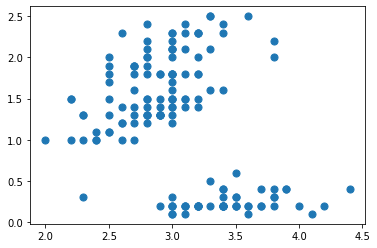

In [28]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
#
# Do the scatter plot and see that clusters are evident
#
plt.scatter(X[:,1], X[:,3],s=50)
plt.show()

# Outlier Detection

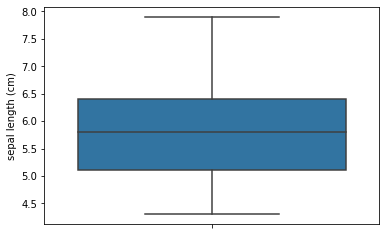

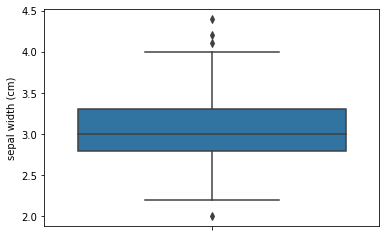

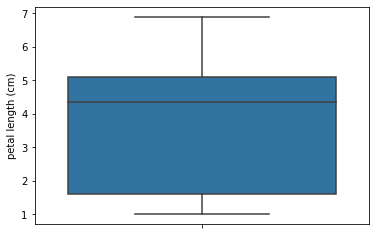

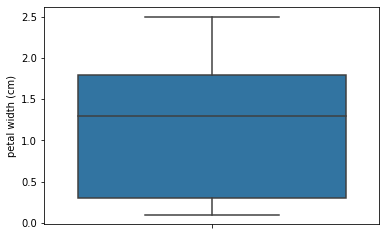

In [34]:
# To find outliers
cols = df.columns
for i in cols:
    sns.boxplot(y=df[i])
    plt.show()

## From the above boxplot we can say that there are outliers in the column 'sepal width (cm)'

# Outlier Removal

In [35]:
# To remove outliers from 'sepal width (cm)'
q1 = df['sepal width (cm)'].quantile(0.25)
q3 = df['sepal width (cm)'].quantile(0.75)
iqr = q3 - q1
df = df[(df['sepal width (cm)'] >= q1-1.5*iqr) & (df['sepal width (cm)'] <= q3+1.5*iqr)]
df.shape # To find out the number of rows and column after outlier treatment

(146, 4)

## We can see that after outlier treatment the number of rows are reduced to 146 from 150

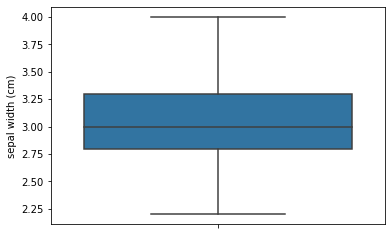

In [36]:
# Boxplot for sepal width (cm) after outlier treatment
sns.boxplot(y=df['sepal width (cm)'])
plt.show()

# Finding the optimal number of clusters and determining the value of K

In [39]:
# Finding the optimum number of clusters for k-means classification
x = df.iloc[:, [0, 1, 2, 3]].values
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Ploting elbow curve to find the no. of cluster

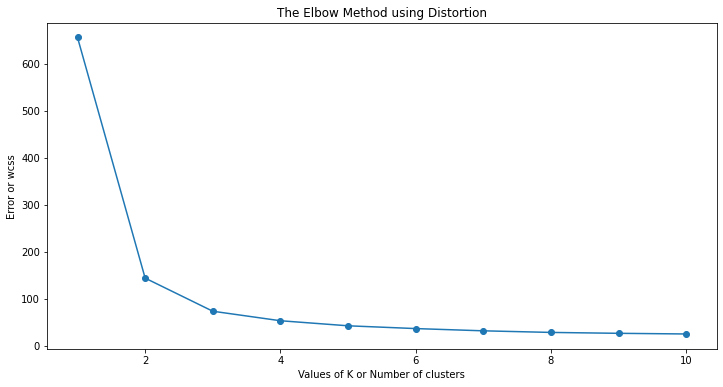

In [42]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.figure(figsize=(12,6))
plt.plot(range(1, 11), wcss, marker = 'o') 
plt.xlabel('Values of K or Number of clusters') 
plt.ylabel('Error or wcss') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

### "The elbow method" got its name from the elbow pattern forming something like above. The optimal clusters are formed where the elbow occurs. This is when the WCSS(Within Cluster Sum of Squares) doesn't decrease with every iteration significantly.

### Here we choose the number of clusters as '3'.

# Creating K-Means Classifier

In [43]:
# Applying kmeans to the dataset 
# Creating the kmeans classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Visualizing the cluster data

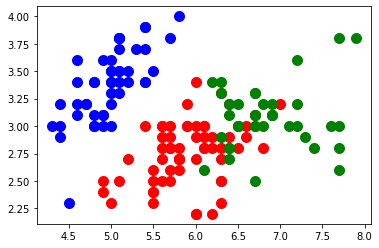

In [44]:
# Visualising the clusters 
# Preferably on the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters

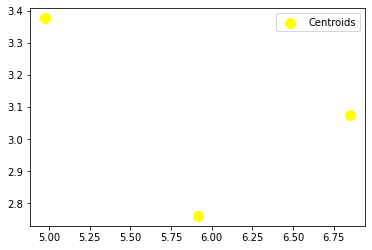

In [45]:
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

# Now Combining both the above graphs together

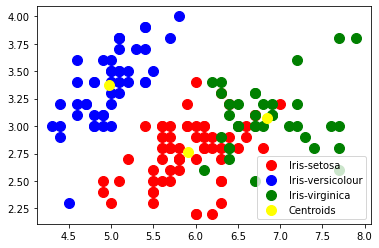

In [46]:
# Visualising the clusters 
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()